In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split

df=pd.read_csv("student_performance.csv ")

In [39]:
print(df.head())

   Hours_Studied  Previous_Scores Extracurricular  Sleep_Hours  \
0              2               40              No            6   
1              5               60             Yes            7   
2              8               85              No            8   
3              1               35              No            5   
4              6               75             Yes            7   

  Internet_Access  Attendance Performance  
0             Yes          70         Low  
1             Yes          80      Medium  
2             Yes          90        High  
3              No          60         Low  
4             Yes          85        High  


In [40]:
print(df.isnull().sum())

Hours_Studied      0
Previous_Scores    0
Extracurricular    0
Sleep_Hours        0
Internet_Access    0
Attendance         0
Performance        0
dtype: int64


In [41]:

df['Extracurricular'] = df['Extracurricular'].map({'No': 0, 'Yes': 1})
df['Internet_Access'] = df['Internet_Access'].map({'No': 0, 'Yes': 1})

display(df)




,Hours_Studied,Previous_Scores,Extracurricular,Sleep_Hours,Internet_Access,Attendance,Performance
0,2,40,0,6,1,70,Low
1,5,60,1,7,1,80,Medium
2,8,85,0,8,1,90,High
3,1,35,0,5,0,60,Low
4,6,75,1,7,1,85,High
5,4,55,1,6,1,78,Medium
6,3,45,0,7,0,72,Low
7,7,80,1,8,1,95,High
8,5,65,0,6,1,82,Medium
9,2,50,1,5,0,68,Low


In [28]:
print(df.head())

   Hours_Studied  Previous_Scores  Extracurricular  Sleep_Hours  \
0              2               40                0            6   
1              5               60                1            7   
2              8               85                0            8   
3              1               35                0            5   
4              6               75                1            7   

   Internet_Access  Attendance  Performance  
0                1          70            0  
1                1          80            1  
2                1          90            2  
3                0          60            0  
4                1          85            2  


In [42]:
# Split the dataset into features (X) and target (y)
X = df.drop('Performance', axis=1)
y = df['Performance']


In [43]:
# Perform a 70/30 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Hours_Studied    20 non-null     int64 
 1   Previous_Scores  20 non-null     int64 
 2   Extracurricular  20 non-null     int64 
 3   Sleep_Hours      20 non-null     int64 
 4   Internet_Access  20 non-null     int64 
 5   Attendance       20 non-null     int64 
 6   Performance      20 non-null     object
dtypes: int64(6), object(1)
memory usage: 1.2+ KB
None
   Hours_Studied  Previous_Scores  Extracurricular  Sleep_Hours  \
0              2               40                0            6   
1              5               60                1            7   
2              8               85                0            8   
3              1               35                0            5   
4              6               75                1            7   

   Internet_Access  Attendance Perf

In [45]:
#model bulding
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
# Train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Print the learned decision rules
feature_names = X.columns.tolist()
dt_rules = export_text(dt_classifier, feature_names=feature_names)

print("Learned Decision Rules (Tree Structure):\n")
print(dt_rules)


Learned Decision Rules (Tree Structure):

|--- Internet_Access <= 0.50
|   |--- class: Low
|--- Internet_Access >  0.50
|   |--- Sleep_Hours <= 6.50
|   |   |--- class: Medium
|   |--- Sleep_Hours >  6.50
|   |   |--- class: High



In [47]:
# Predict on the test set
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High'],zero_division=0)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.5

Confusion Matrix:
 [[1 0 0]
 [0 0 1]
 [2 0 2]]

Classification Report:
               precision    recall  f1-score   support

         Low       0.33      1.00      0.50         1
      Medium       0.00      0.00      0.00         1
        High       0.67      0.50      0.57         4

    accuracy                           0.50         6
   macro avg       0.33      0.50      0.36         6
weighted avg       0.50      0.50      0.46         6



In [48]:

#model tuning
# Experiment with different hyperparameters
print("Comparing models with different hyperparameters:\n")

# Model 1: criterion='gini', max_depth=3
dt_gini_3 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dt_gini_3.fit(X_train, y_train)
y_pred_gini_3 = dt_gini_3.predict(X_test)
accuracy_gini_3 = accuracy_score(y_test, y_pred_gini_3)
print(f"Accuracy with criterion='gini', max_depth=3: {accuracy_gini_3}")

# Model 2: criterion='entropy', max_depth=3
dt_entropy_3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dt_entropy_3.fit(X_train, y_train)
y_pred_entropy_3 = dt_entropy_3.predict(X_test)
accuracy_entropy_3 = accuracy_score(y_test, y_pred_entropy_3)
print(f"Accuracy with criterion='entropy', max_depth=3: {accuracy_entropy_3}")

# Model 3: criterion='gini', max_depth=5
dt_gini_5 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt_gini_5.fit(X_train, y_train)
y_pred_gini_5 = dt_gini_5.predict(X_test)
accuracy_gini_5 = accuracy_score(y_test, y_pred_gini_5)
print(f"Accuracy with criterion='gini', max_depth=5: {accuracy_gini_5}")

# Model 4: criterion='entropy', max_depth=5
dt_entropy_5 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dt_entropy_5.fit(X_train, y_train)
y_pred_entropy_5 = dt_entropy_5.predict(X_test)
accuracy_entropy_5 = accuracy_score(y_test, y_pred_entropy_5)
print(f"Accuracy with criterion='entropy', max_depth=5: {accuracy_entropy_5}")

Comparing models with different hyperparameters:

Accuracy with criterion='gini', max_depth=3: 0.5
Accuracy with criterion='entropy', max_depth=3: 0.5
Accuracy with criterion='gini', max_depth=5: 0.5
Accuracy with criterion='entropy', max_depth=5: 0.5


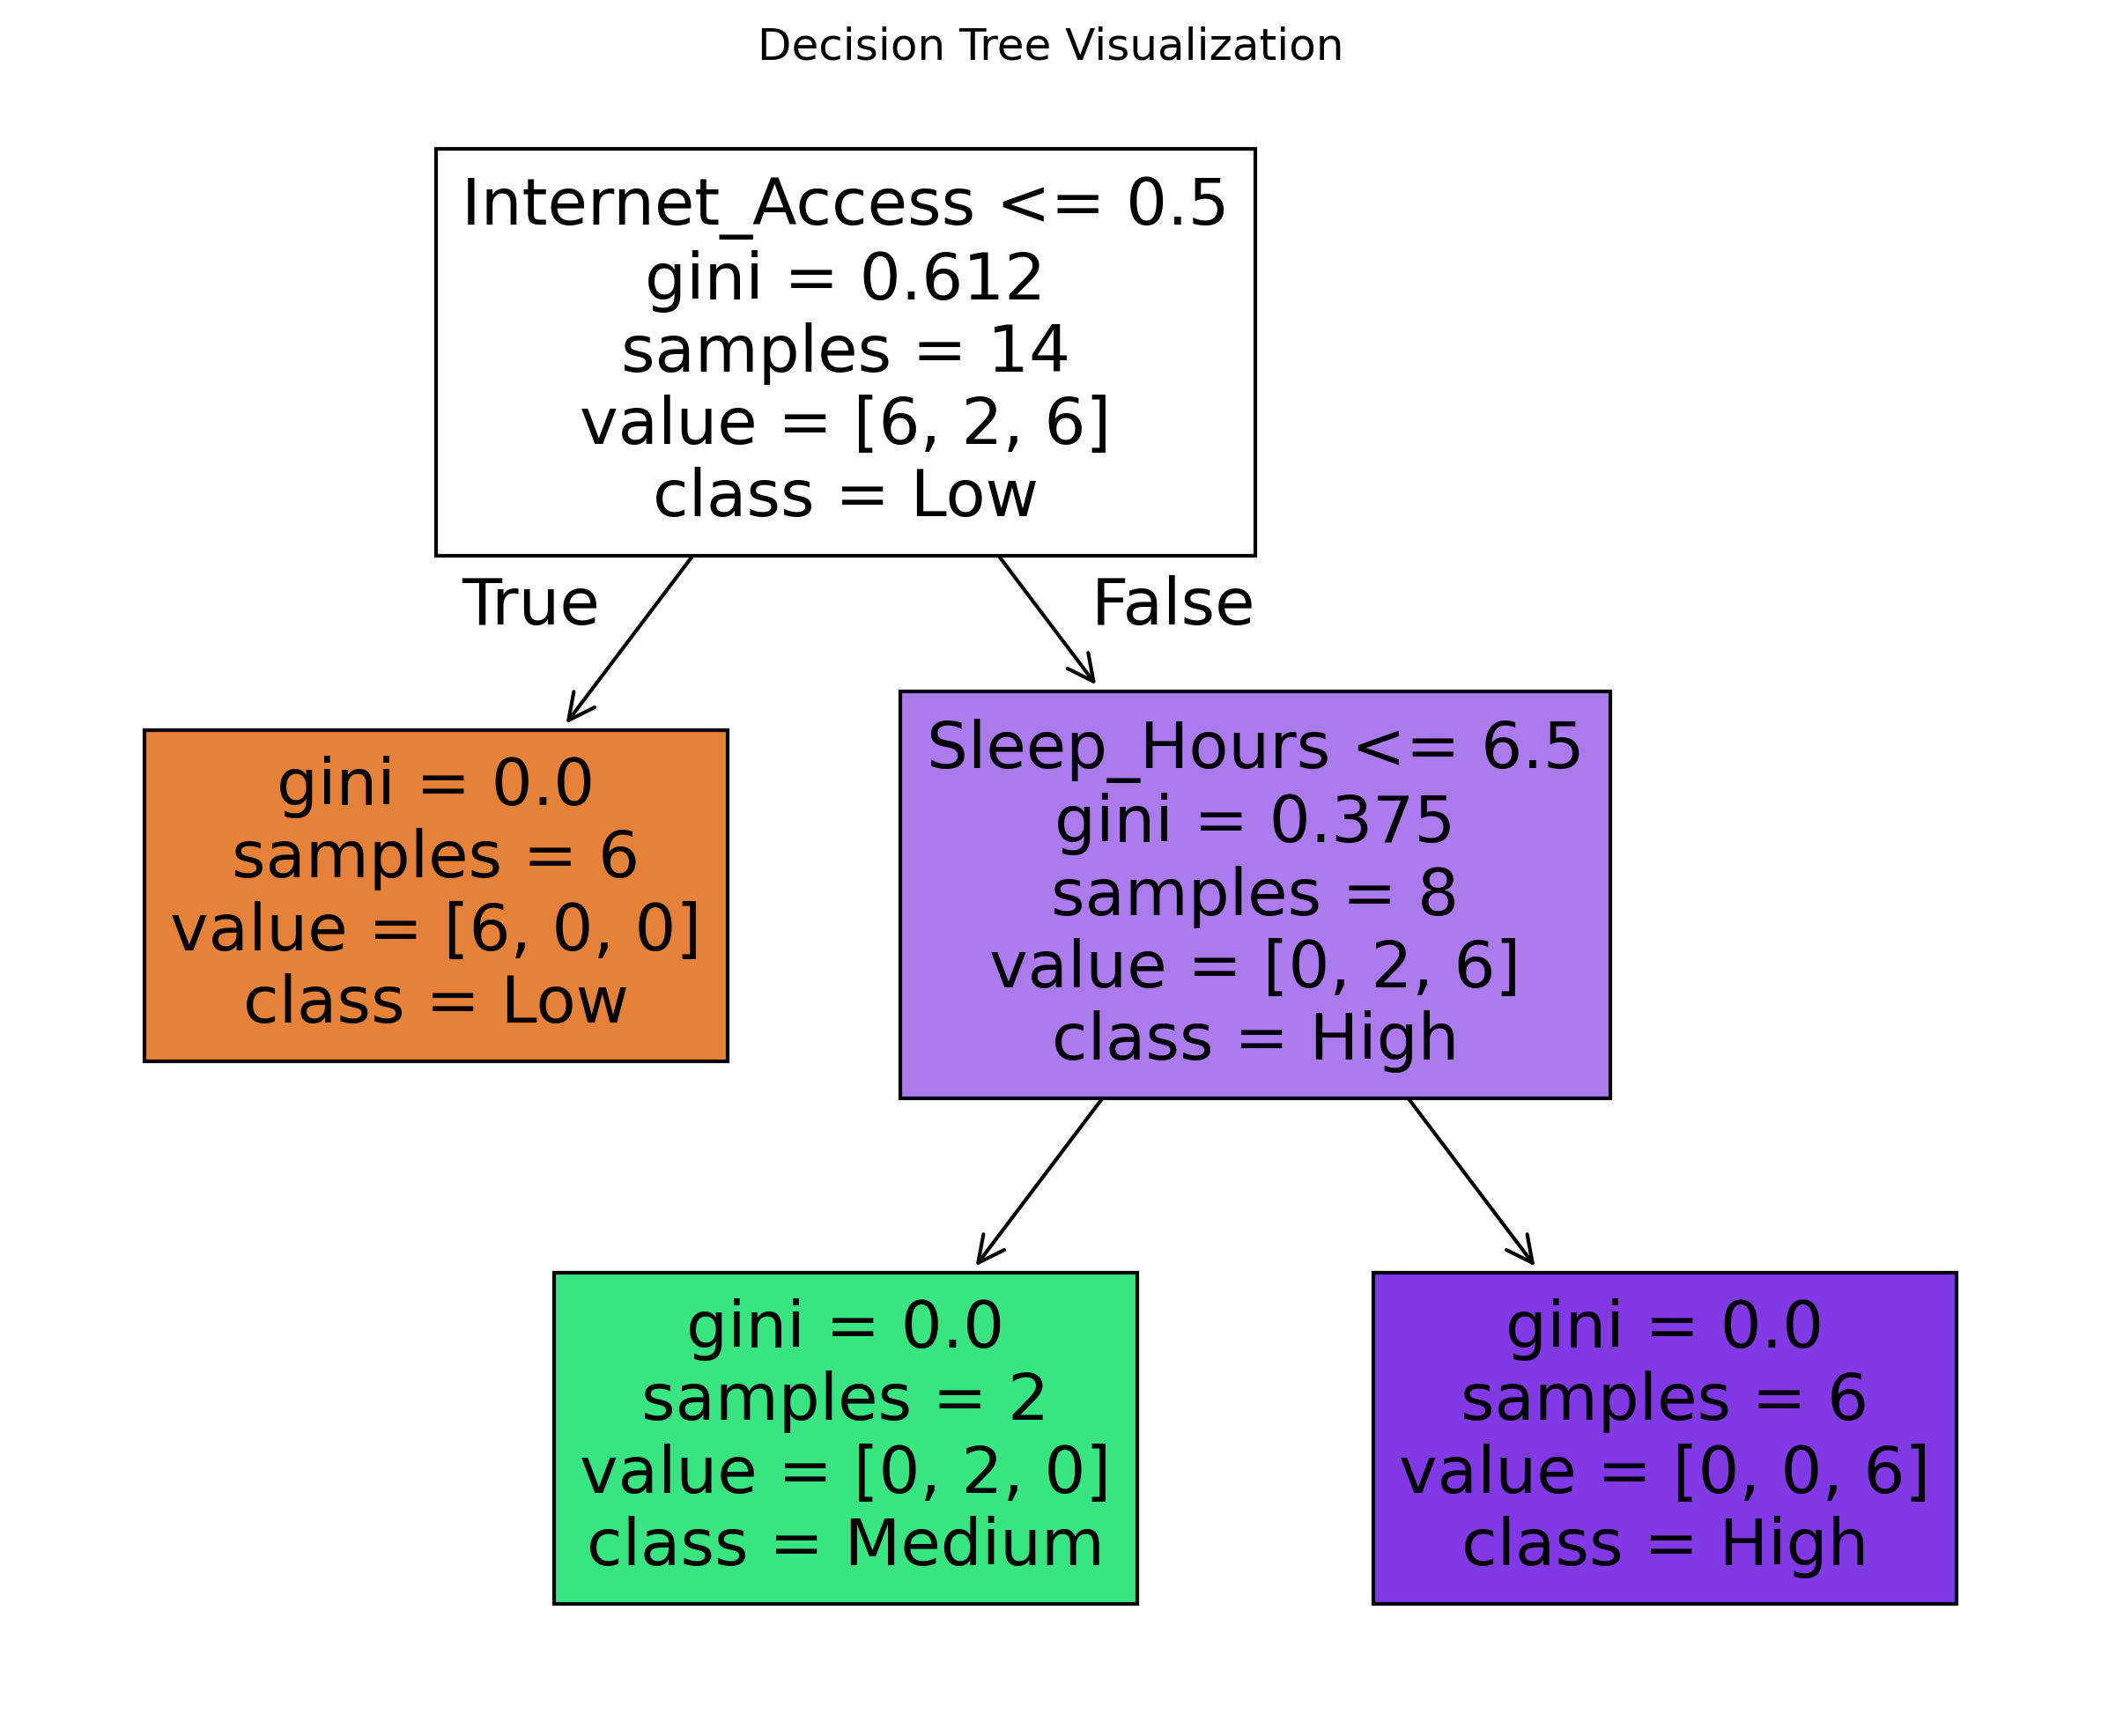

Feature Importances:

|                 | 0    |
|:----------------|:-----|
| Internet_Access | 0.65 |
| Sleep_Hours     | 0.35 |
| Hours_Studied   | 0    |
| Previous_Scores | 0    |
| Extracurricular | 0    |
| Attendance      | 0    |


In [51]:

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


# Plot the decision tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8), dpi=300)
plot_tree(
    dt_classifier,
    feature_names=X.columns,
    class_names=['Low', 'Medium', 'High'],
    filled=True,
    ax=axes
)
plt.title("Decision Tree Visualization")
plt.show()

# Get and print feature importances
feature_importances = pd.Series(dt_classifier.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Feature Importances:\n")
print(feature_importances.to_markdown(numalign='left', stralign='left'))